# The purpose of this script is to analyze the 2021 NeurIPS papers and rank them by review scores

In [56]:
import pickle
import matplotlib.pyplot as plt
import pprint
import numpy as np

### Load data

In [91]:
with open('data/2021_neurips_processed_paper_data.pkl' ,'rb') as file:
    paper_data = pickle.load(file)

paper_by_name_dict = {}
for paper in paper_data:
    
    if paper['title'] in paper_by_name_dict:
        paper_by_name_dict[paper['title']]['review_2'] = paper
    else:
        paper_by_name_dict[paper['title']] = paper

### Compute the number of papers with code

In [92]:
papers_with_code = 0
for paper_name in paper_by_name_dict:
    paper = paper_by_name_dict[paper_name]
    
    if paper['code'] is not None:
        papers_with_code += 1
        
print('%d papers have code out of %d total papers' % (papers_with_code, len(paper_by_name_dict)))
print('%.02f%% of papers come with code' % (100*papers_with_code/len(paper_by_name_dict)) )

1507 papers have code out of 2469 total papers
61.04% of papers come with code


### Compute the occurrence of keywords over the set of papers

In [93]:
keyword_dict = {}
for paper_name in paper_by_name_dict:
    paper = paper_by_name_dict[paper_name]
    for keyword in paper['keywords']:
        if keyword.lower() not in keyword_dict:
            keyword_dict[keyword.lower()] = 0
        keyword_dict[keyword.lower()] += 1
    

sorted_keyword_occurrences = {k: v for k, v in sorted(keyword_dict.items(), key=lambda item: -item[1])}
print('number of distinct keywords: %d' % (len(sorted_keyword_occurrences)))
for keyword in sorted_keyword_occurrences:
    print(sorted_keyword_occurrences[keyword], keyword)
    

number of distinct keywords: 5384
183 reinforcement learning
130 deep learning
59 self-supervised learning
56 representation learning
54 generalization
54 transformer
53 graph neural networks
50 robustness
49 meta-learning
47 online learning
44 differential privacy
41 optimization
41 computer vision
40 neural networks
39 federated learning
38 fairness
38 adversarial robustness
37 generative models
37 transfer learning
37 contrastive learning
35 causal inference
34 convex optimization
34 variational inference
33 transformers
31 learning theory
30 unsupervised learning
30 gaussian processes
29 interpretability
29 machine learning
29 deep reinforcement learning
28 graph neural network
26 statistical learning theory
25 domain adaptation
25 few-shot learning
24 exploration
23 active learning
23 sparsity
23 continual learning
22 attention
22 theory
22 calibration
21 stochastic optimization
21 multi-armed bandits
20 neuroscience
20 regularization
20 optimal transport
20 clustering
19 distribu

1 episodic control
1 simulator
1 3d convolution
1 se(3)-equivariant feature learning
1 physics-informed neural networks
1 unconstrained optimization
1 distributed and parallel algorithms
1 synthetic data generation
1 label consistency
1 manifold clustering
1 batch normormalization
1 multi-dimensional spatial tasks
1 widget captioning
1 ui modeling
1 neverending learning
1 lifelong learning
1 plasticity-stability dilemma
1 task incremental learning
1 dynamic architectures
1 model growing
1 non-lipschitz
1 synthetic gradient
1 multiple-source domain adaptation
1 communication-efficient mean estimation
1 vector sparsification
1 high dimensionality
1 discrete data
1 goal reaching
1 data pre-processing
1 label noise rate balancing
1 multiple object tracking and segmentation
1 efficient cross-attention networks
1 space-time memory
1 medial entorhinal cortex
1 grid cells
1 biologically-inspired navigation
1 truncated statistics
1 invariance principle
1 robotics and control
1 n:m
1 structured 

1 double robustness
1 cumulative distribution functions
1 risk functionals
1 adaptive gradient algorithms
1 amsgrad
1 unimodal bandits
1 optimal algorithm
1 one-dimensional exponential family distributions
1 recourse
1 actionable recourse
1 retrosynthesis
1 synthons
1 computational chemistry
1 graph autoencoder
1 never-ending learning
1 auxiliary tasks
1 general value functions
1 reconnaissance blind chess
1 surrogate loss functions
1 prediction dimension
1 route recommendation
1 road networks
1 inductive learning
1 quadratic assignment problem
1 automorphic equivalence
1 structural role
1 graph analysis
1 bellman-consistent pessimism
1 sample complexity bounds
1 linear mdp
1 probabilistic model
1 interactive segmentation
1 fuzzy clustering
1 oracle
1 similarity queries
1 soft clustering.
1 latent-variable models
1 deep state-space models
1 bayesian filtering and smoothing
1 empirical bayes
1 constrained optimisation
1 probability distributions
1 statistical rates
1 matching markets
1 

1 coarse correlated equilibrium
1 optimistic hedge
1 offpolicy
1 diffusion algorithm
1 local graph clustering
1 robust control
1 nonconvex-nonconcave optimization
1 maximal inequality
1 metric entropy
1 empirical process theory
1 context agnostic learning
1 hybrid
1 latent flow
1 optimization with noise
1 convex interpolation
1 certifiable training
1 euclidean geometry
1 gradient norm
1 small gradients
1 making gradients small
1 ogm
1 fista
1 ogm-g
1 potential function-based
1 lyapunov analysis
1 complexity bounds
1 test-time adaptation
1 sensory neuroscience
1 systems identification
1 goal-driven models
1 vision neuroscience
1 tiny deep learning
1 tinyml
1 neighbor sampling
1 combinatorial pure exploration
1 bottleneck reward function
1 cascaded networks
1 anytime prediction
1 parallel networks
1 biologically inspired computing
1 speed-accuracy trade off
1 temporal difference methods
1 bellman eluder dimension
1 sum product networks
1 discrete density estimation
1 approximation theore

1 source-free domain adaptation
1 reciprocal nearest neighbors
1 decision and control
1 applications (societal systems)
1 laplacian regularization
1 spectral filtering
1 partial labelling
1 vehicle routing problem
1 efficient classification
1 error correcting output codes
1 binary codes
1 large-scale classification
1 action repetition
1 off-policy rl
1 sequence similarity
1 hyperbolic embeddings
1 low-distortion embeddings
1 implicit planning
1 algorithmic bottleneck
1 information-directed sampling
1 sparse linear bandits
1 bayesian regret
1 loss function
1 embodied autonomous agents
1 lipschitz optimization
1 packing bound
1 function-dependent bound
1 piyavskii-shubert algorithm
1 ai alignment
1 mdp theory
1 optimal policies
1 strategic classification
1 strategic agents
1 few shot learning
1 supervised contrastive learning
1 cardiac signals
1 weight loss landscape
1 dynamic gradient projection memory
1 sharpness flatten
1 quantum learning theory
1 continuum-armed bandit
1 online learn

### Do the following: 1) filter papers to those containing specific keywords in their abstract, 2) rank papers based on average review scores

In [103]:
search_keywords = ['']

filtered_papers = []
for paper_name in paper_by_name_dict:
    paper = paper_by_name_dict[paper_name]
    abstract = paper['abstract'].lower()
    
    found_search_keywords = True
    for search_keyword in search_keywords:
        if search_keyword not in abstract:
            found_search_keywords = False
            
    if found_search_keywords == False:
        print('bad')
        continue
    
    ratings = []
    for rating in paper['rating_list']:
        ratings.append(float(rating.split(':')[0]))
    if len(ratings) == 0:
        ratings.append(-1)
    
    
    filtered_papers.append( (np.mean(ratings), paper))
    
sorted_filtered_papers = sorted(filtered_papers, key=lambda paper: paper[0], reverse=False)
average_ratings = [x[0] for x in filtered_papers]



paper_id = 0
for average_rating, paper in sorted_filtered_papers:
    paper_id += 1
    print('paper rank: %d' % (paper_id))
    print('Average Rating:', average_rating)
    print('Title:', paper['title'])
    print('Keywords:', paper['keywords'])
    print('Code:', paper['code'])
    print('PDF URL:', paper['pdf'])
    print('Review URL:', paper['url'])
    print('Venue:',paper['venue'])
    print('Abstract:',paper['abstract'])
    
    print('\n\n\n')
    
    if paper_id > 30:
        break
    


paper rank: 1
Average Rating: 2.5
Title: Missing Data Infill with Automunge
Keywords: ['missing data', 'tabular', 'infrastructure']
Code: None
PDF URL: https://openreview.net/pdf/f3577f0d93fad2c50bcf482afeb40dd062e0bb51.pdf
Review URL: https://openreview.net/forum?id=o2tx_m7hK3t
Venue: NeurIPS 2021 Submitted
Abstract: Missing data is a fundamental obstacle in the practice of data science. This paper surveys a few conventions for imputation as available in the Automunge open source python library platform for tabular data preprocessing, including "ML infill" in which auto ML models are trained for target features from partitioned extracts of a training set. A series of validation experiments were performed to benchmark imputation scenarios towards downstream model performance, in which it was found for the given benchmark sets that in many cases ML infill outperformed for both numeric and categoric target features, and was otherwise at minimum within noise distributions of the other imp

### Plot average rating histogram

Text(0.5, 1.0, 'Histogram of paper average rating')

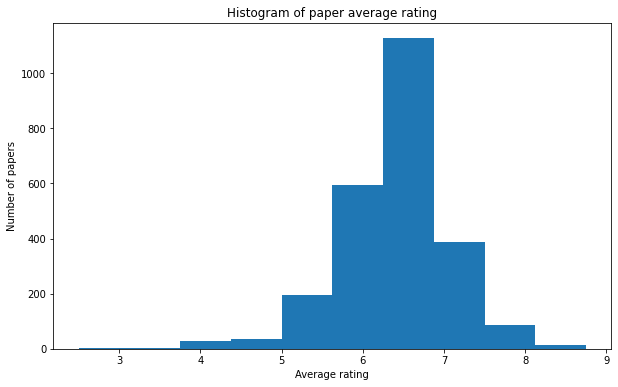

In [99]:
plt.figure(figsize=(10,6))
plt.hist(average_ratings)
plt.xlabel('Average rating')
plt.ylabel('Number of papers')
plt.title('Histogram of paper average rating')